In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc

In [14]:
# Load the dataset (replace 'path_to_your_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/Administrator/Documents/kifiya/Week_6/processed_data.csv')

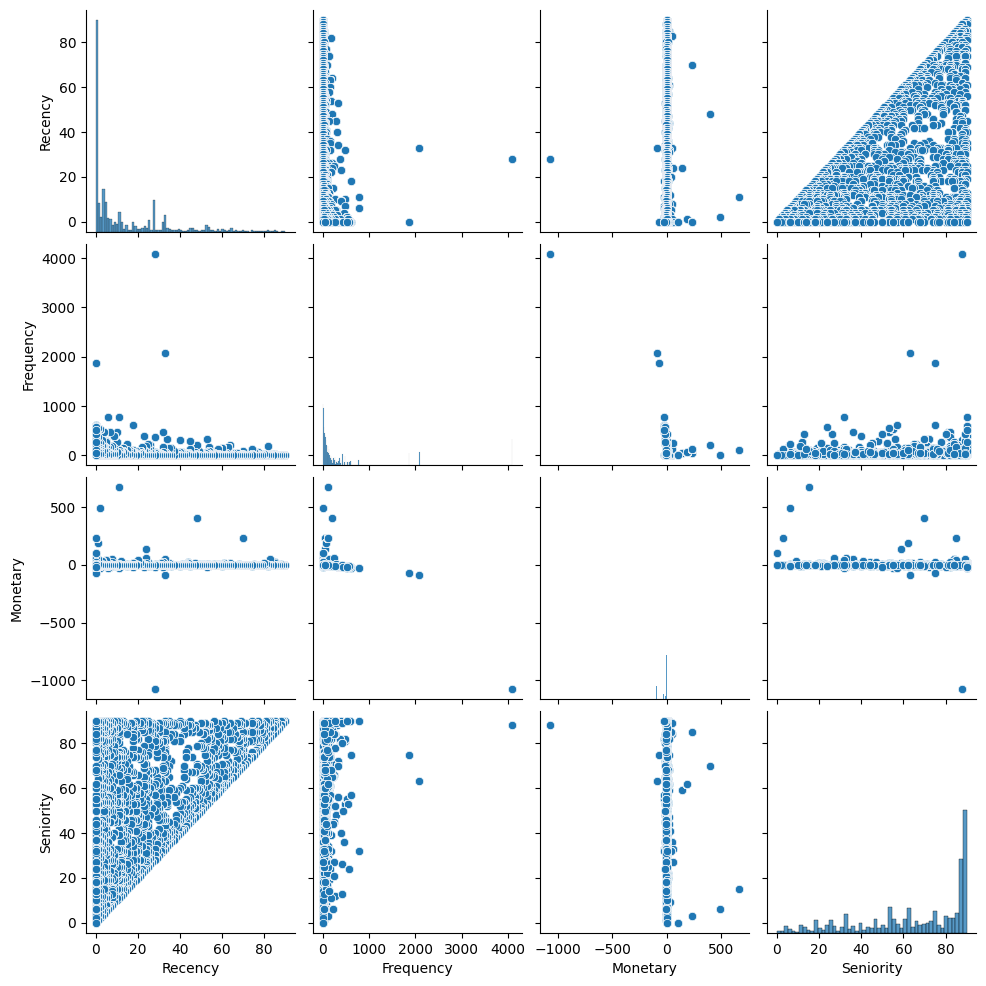

In [15]:
# 1. Constructing a Default Estimator using RFMS formalism


# Convert 'TransactionStartTime' to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

# Create RFMS features
# Recency: Days since the last transaction
df['Recency'] = (df['TransactionStartTime'].max() - df.groupby('CustomerId')['TransactionStartTime'].transform('max')).dt.days

# Frequency: Total number of transactions per customer
df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')

# Monetary: Total transaction amount per customer
df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')

# Seniority: Days since the first transaction (engagement duration)
df['Seniority'] = (df['TransactionStartTime'].max() - df.groupby('CustomerId')['TransactionStartTime'].transform('min')).dt.days

# Visualize the RFMS features in pair plots to check distribution
sns.pairplot(df[['Recency', 'Frequency', 'Monetary', 'Seniority']])
plt.show()

In [18]:
# ---------------------
# 1b. Assign Good/Bad Labels Based on RFMS Score
# ---------------------

# Calculate RFMS score by multiplying features (adjust the logic based on your understanding)
df['RFMS_Score'] = df['Recency'] * df['Frequency'] * df['Monetary'] * df['Seniority']

# Define a threshold to classify users as 'good' or 'bad'
# Adjust the threshold based on your RFMS analysis (visualize to understand the distribution first)
threshold = df['RFMS_Score'].quantile(0.5)  # You can adjust this threshold
df['RiskLabel'] = df['RFMS_Score'].apply(lambda x: 'bad' if x < threshold else 'good')

# Check the distribution of good and bad users
display(df['RiskLabel'].value_counts())

RiskLabel
good    47853
bad     47809
Name: count, dtype: int64

In [17]:
# ---------------------
# 2. Perform WoE Binning
# ---------------------

# Perform WoE binning for RFMS features
features_to_bin = ['Recency', 'Frequency', 'Monetary', 'Seniority']

# WoE binning for RFMS features based on 'RiskLabel'
bins = sc.woebin(df, y='RiskLabel', x=features_to_bin)

# Apply WoE binning to the dataset
df_woe = sc.woebin_ply(df, bins)

# View the transformed dataset with WoE features
print(df_woe.head())

# ---------------------
# 3. Check Information Value (IV)
# ---------------------

# Create a DataFrame to store IV values for each feature
iv_df = pd.DataFrame({k: v['total_iv'].iloc[0] for k, v in bins.items()}, index=['IV']).T

# Print IV values for each feature
display(iv_df)

# ---------------------
# 4. Save the transformed dataset (optional)
# ---------------------
df_woe.to_csv('C:/Users/Administrator/Documents/kifiya/Week_6/df_woe_task4.csv', index=False)


[INFO] creating woe binning ...


c:\Users\Administrator\miniconda3\envs\jojo\lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "RiskLabel" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))
c:\Users\Administrator\miniconda3\envs\jojo\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Administrator\miniconda3\envs\jojo\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_nu

[INFO] converting into woe values ...
      Value  AverageTransactionAmount  TransactionYear       CustomerId  \
0 -0.072291                 -0.067623             2018  CustomerId_4406   
1 -0.080251                 -0.067623             2018  CustomerId_4406   
2 -0.076352                 -0.072568             2018  CustomerId_4683   
3  0.096648                 -0.008155             2018   CustomerId_988   
4 -0.075183                 -0.008155             2018   CustomerId_988   

          BatchId RiskLabel  PricingStrategy        TransactionId  \
0   BatchId_36123      good                2  TransactionId_76871   
1   BatchId_15642      good                2  TransactionId_73770   
2   BatchId_53941      good                2  TransactionId_26203   
3  BatchId_102363      good                2    TransactionId_380   
4   BatchId_38780      good                2  TransactionId_28195   

      ProductId   RFMS_Score  ...  ChannelId_woe  TransactionHour FraudResult  \
0  ProductId_10